In [1]:
import numpy as np
import pandas as pd

In [2]:
cols = ['timestamp', 'clientIP', 'backendIP', 'request_processing_time', 
        'backend_processing_time', 'response_process_time', 'status_code', 'backend_status_code', 
        'received_bytes', 'sent_bytes', 'request', 'user_agent', 'ssl_cipher', 'ssl_protocol']

In [3]:
df = pd.read_csv('test.log', header=None, names=cols, delimiter=' ', 
                 parse_dates=['timestamp'], index_col=False)
df.head()

,timestamp,clientIP,backendIP,request_processing_time,backend_processing_time,response_process_time,status_code,backend_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,ssl_protocol
0,2019-07-22 09:00:28.019143+00:00,123.242.248.130:54635,10.0.6.158:80,0.000022,0.026109,0.000020,200,200,0,699,GET https://muna.com:443/shop/authresponse?cod...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
1,2019-07-22 09:00:27.894580+00:00,203.91.211.44:51402,10.0.4.150:80,0.000024,0.153340,0.000026,200,200,0,1497,GET https://muna.com:443/shop/wallet/txnhistor...,Mozilla/5.0 (Windows NT 6.1; rv:39.0) Gecko/20...,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
2,2019-07-22 09:00:27.885745+00:00,1.39.32.179:56419,10.0.4.244:80,0.000024,0.164958,0.000017,200,200,0,157,GET https://muna.com:443/shop/wallet/txnhistor...,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
3,2019-07-22 09:00:28.048369+00:00,180.179.213.94:48725,10.0.6.108:80,0.000020,0.002333,0.000021,200,200,0,35734,GET https://muna.com:443/shop/p/micromax-yu-yu...,-,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2
4,2019-07-22 09:00:28.036251+00:00,120.59.192.208:13527,10.0.4.217:80,0.000024,0.015091,0.000016,200,200,68,640,POST https://muna.com:443/papi/v1/expresscart/...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ECDHE-RSA-AES128-GCM-SHA256,TLSv1.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158500 entries, 0 to 1158499
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype              
---  ------                   --------------    -----              
 0   timestamp                1158500 non-null  datetime64[ns, UTC]
 1   clientIP                 1158500 non-null  object             
 2   backendIP                1158500 non-null  object             
 3   request_processing_time  1158500 non-null  float64            
 4   backend_processing_time  1158500 non-null  float64            
 5   response_process_time    1158500 non-null  float64            
 6   status_code              1158500 non-null  int64              
 7   backend_status_code      1158500 non-null  int64              
 8   received_bytes           1158500 non-null  int64              
 9   sent_bytes               1158500 non-null  int64              
 10  request                  1158500 non-null  object             
 11

# Tasks 1, 2, 3, 4

## Task 1: Aggregate the pages by clientIP during a session
Assumptions:
- A session is defined by a clientIP:port

## Task 3: Find unique URL visits per session

In [65]:
df_sess = df.groupby('clientIP').agg({'timestamp': lambda x: (max(x) - min(x)).total_seconds(), 
                                      'request': [lambda x: list(x.apply(lambda x: x.split(' ', 2)[1])), 
                                                  pd.Series.nunique]})
df_sess.columns = ['sess_duration', 'pages', 'request_count']
df_sess

KeyboardInterrupt: 

## Task 2: Find average session time
Assumptions:
- A session lasts from the first request from a clientIP:port till the last request made by the same clientIP:port
- Sessions with 0 duration (as quantified by the said method) are excluded

In [22]:
avg_sess_duration = df_sess.sess_duration[df_sess.sess_duration > 0].mean()
print(f'Average session time: {avg_sess_duration:.6f} seconds')

Average session time: 3570.433947 seconds


## Task 4: Find IPs with the longest session times

In [25]:
df_sess.sort_values(by='sess_duration', ascending=False)

,sess_duration,pages,request_count
clientIP,,,
106.186.23.95:35629,66510.415715,[https://muna.com:443/papi/v1/promosearch/prod...,2
106.186.23.95:35626,66510.397053,[https://muna.com:443/papi/v1/promosearch/prod...,2
106.186.23.95:35632,66510.396773,[https://muna.com:443/papi/v1/promosearch/prod...,2
106.186.23.95:40263,66499.709337,[https://muna.com:443/papi/v1/promosearch/prod...,4
106.186.23.95:40411,66499.668705,[https://muna.com:443/papi/v1/promosearch/prod...,3
...,...,...,...
14.102.106.68:56645,0.000000,[https://muna.com:443/recharge-partners],1
14.102.106.68:56768,0.000000,[http://www.muna.com:80/recharge-partners],1
14.102.107.130:28266,0.000000,[https://muna.com:443/shop/g/books-media-stati...,1


In [37]:
df_sess_sorted_by_sess_duration = df_sess.sort_values(by='sess_duration', ascending=False)
IPs_sorted_by_sess_duration = df_sess_sorted_by_sess_duration.index.str.split(':').str[0]

print(f"Ten IPs with the longest session time: {IPs_sorted_by_sess_duration[:10].to_list()}")

Ten IPs with the longest session time: ['106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95', '106.186.23.95']


## Task 5: Predict the expected load (requests/second) in the next minute
This is a machine learning task on time-series data. For simplicity, we model the task as a univariate forecasting problem

We first aggregate the requests by seconds, which correspond precisely to the load (requests/second)

In [38]:
agg_1min = df.groupby([df.timestamp.dt.floor('1s')]).size()
agg_1min

timestamp
2019-07-22 02:40:06+00:00     27
2019-07-22 02:40:07+00:00     62
2019-07-22 02:40:08+00:00     56
2019-07-22 02:40:09+00:00    112
2019-07-22 02:40:10+00:00     58
                            ... 
2019-07-22 21:10:23+00:00     72
2019-07-22 21:10:24+00:00     99
2019-07-22 21:10:25+00:00     69
2019-07-22 21:10:26+00:00     98
2019-07-22 21:10:27+00:00    103
Length: 4269, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

For the input, we sample the previous 5 data points to predict that next data point

In [44]:
cols = list()
for i in range(6, 0, -1):
    cols.append(agg_1min.shift(i))
data = pd.concat(cols, axis=1)
data = data.dropna()
data

,0,1,2,3,4,5
timestamp,,,,,,
2019-07-22 02:40:12+00:00,27.0,62.0,56.0,112.0,58.0,58.0
2019-07-22 02:40:13+00:00,62.0,56.0,112.0,58.0,58.0,67.0
2019-07-22 02:40:14+00:00,56.0,112.0,58.0,58.0,67.0,85.0
2019-07-22 02:40:15+00:00,112.0,58.0,58.0,67.0,85.0,160.0
2019-07-22 02:40:16+00:00,58.0,58.0,67.0,85.0,160.0,57.0
...,...,...,...,...,...,...
2019-07-22 21:10:23+00:00,166.0,122.0,100.0,107.0,73.0,74.0
2019-07-22 21:10:24+00:00,122.0,100.0,107.0,73.0,74.0,72.0
2019-07-22 21:10:25+00:00,100.0,107.0,73.0,74.0,72.0,99.0


In [46]:
def train_test_split(data, test_fraction):
    test_num = int(len(data)*test_fraction)
    return data[:-test_num], data[-test_num:]

In [47]:
train, test = train_test_split(data.values, 0.1)
train_X, train_y = train[:, :-1], train[:, -1]

In [48]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(train_X, train_y)

RandomForestRegressor(n_estimators=1000)

In [49]:
predictions = []
for i in range(len(test)):
    test_X, test_y = test[i, :-1], test[i, -1]
    y_hat = model.predict([test_X])
    predictions.append(y_hat)

In [50]:
rms = sqrt(mean_squared_error(test[:, 0], predictions))
rms

46.89722684888691

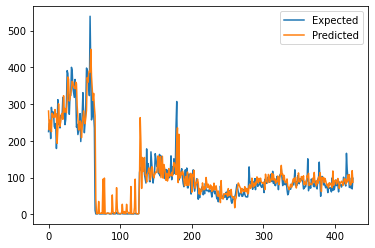

In [51]:
pyplot.plot(test[:, -1], label='Expected')
pyplot.plot(predictions, label='Predicted')
pyplot.legend()
pyplot.show()